<a href="https://colab.research.google.com/github/OmarovaJuma/AI.MO/blob/main/Lr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Выполнила Омарова Джума группа ПИН-б-о-22-1**

## **Тема: Логические методы классификации**

# **Первичный анализ**

*Описание набора данных*

Набор данных "Raisin" содержит информацию о 900 изюминках двух сортов: Кечимен и Бесни. Для каждой изюминки были извлечены 7 морфологических признаков.

*Описание признаков*

> Area: Количество пикселей внутри границ изюминки.

> MajorAxisLength: Длина главной оси, которая является самой длинной линией, которую можно провести по изюминке.

> MinorAxisLength: Длина малой оси, которая является самой короткой линией, которую можно провести по изюминке.

> Eccentricity: Мера эксцентриситета эллипса, имеющего те же моменты, что и изюминка.

> ConvexArea: Количество пикселей наименьшей выпуклой оболочки области, образованной изюминкой.

> Extent: Отношение площади, образованной изюминкой, к общему количеству пикселей в ограничивающем прямоугольнике.

> Perimeter: Окружность изюминки.

> Class: Сорт изюминки (Кечимен или Бесни).

*Форма набора данных:*

Набор данных имеет форму таблицы с 900 строками (экземплярами) и 8 столбцами (признаками).

*Предположения*

Данные не содержат пропущенных значений.
Признаки имеют нормальное распределение.
Признаки не коррелируют друг с другом.

*Статистические показатели*

In [ ]:
# Вычислить статистические показатели
average = d.mean()

# Вывести статистические показатели
print("Среднее значение:\n", average)

Среднее значение:
 Area               87804.127778
MajorAxisLength      430.929950
MinorAxisLength      254.488133
Eccentricity           0.781542
ConvexArea         91186.090000
Extent                 0.699508
Perimeter           1165.906636
dtype: float64


<ipython-input-12-333d26f940ef>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average = d.mean()


In [ ]:
# Вычислить статистические показатели
min = d.min()

# Вывести статистические показатели
print("Минимум:\n", min)

Минимум:
 Area                    25387
MajorAxisLength    225.629541
MinorAxisLength    143.710872
Eccentricity          0.34873
ConvexArea              26139
Extent               0.379856
Perimeter             619.074
Class                   Besni
dtype: object


In [ ]:
# Вычислить статистические показатели
max = d.max()

# Вывести статистические показатели
print("Максимум:\n", max)

Максимум:
 Area                   235047
MajorAxisLength    997.291941
MinorAxisLength    492.275279
Eccentricity         0.962124
ConvexArea             278217
Extent               0.835455
Perimeter            2697.753
Class                 Kecimen
dtype: object


Импорт библиотек:

> pandas: Для обработки и манипулирования данными.

> numpy: Для математических операций и создания массивов.

> sklearn.tree: Для создания и обучения дерева решений.

> sklearn.model_selection: Для разделения данных и перекрестной проверки.

> matplotlib.pyplot: Для визуализации.

> sklearn.tree: Для печати дерева решений.

> sklearn.tree: Для визуализации дерева решений.

Загрузка и подготовка данных:

Данные преобразуются в объект DataFrame с помощью pd.DataFrame()

Разделение данных на обучающий и тестовый наборы:

Данные разделяются на обучающий и тестовый наборы с помощью train_test_split().
Обычно обучающий набор используется для обучения модели, а тестовый набор - для оценки ее производительности.

Создание и обучение дерева решений:

Создается экземпляр классификатора дерева решений с помощью DecisionTreeClassifier().
Модель обучается на обучающем наборе с помощью fit().

Оценка модели:

Оценка производительности модели с помощью перекрестной проверки с помощью cross_val_score().
Перекрестная проверка повторяет обучение и оценку модели на разных подмножествах данных, чтобы получить более надежную оценку.

Визуализация дерева решений:

Дерево решений печатается с помощью tree.export_graphviz().
Дерево решений визуализируется с помощью plot_tree().

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree

Загрузка и обработка данных

> data_source содержит путь к файлу данных Excel с именем "Raisin_Dataset.xlsx".

> d = pd.read_excel(data_source): считывает данные из файла Excel и сохраняет их в переменную d.

> dX = d.iloc[:, :7]: извлекает первые 7 столбцов из d и сохраняет их в dX. Это входные данные для модели.

> dy = d['Class']: извлекает столбец "Class" из d и сохраняет его в dy. Это целевая переменная для модели.

Вывод данных

> print(dX.head()): выводит первые несколько строк из dX. Это позволяет просмотреть входные данные.

> print(): выводит пустую строку для разделения вывода.

> print(dy.head()): выводит первые несколько строк из dy. Это позволяет просмотреть целевую переменную.

In [ ]:
data_source = "dataset/Raisin_Dataset.xlsx"
d = pd.read_excel(data_source)
dX = d.iloc[:, :7]
dy = d['Class']

print(dX.head())
print()
print(dy.head())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  

0    Kecimen
1    Kecimen
2    Kecimen
3    Kecimen
4    Kecimen
Name: Class, dtype: object


### **Построение логического классификатора с заданием max_depth и max_features; визуализация дерева решений**

Разделение данных:

Исходные данные разделяются на обучающую (X_train, y_train) и тестовую (X_test, y_test) выборки с помощью функции train_test_split. Обучающая выборка составляет 80% данных, тестовая выборка - 20%.

Построение дерева классификации:

Создается экземпляр классификатора DecisionTreeClassifier с указанием параметров max_depth=3 (максимальная глубина дерева) и max_features=4 (количество наиболее значимых признаков), после чего классификатор обучается на обучающих данных с использованием метода fit.

Визуализация дерева решений:

С помощью функции plot_tree изображается графическое представление построенного дерева решений. На графике отображаются условия принятия решений на основе признаков и прогнозируемые классы на листьях дерева. Полученное изображение сохраняется в файл 'tree.png'.

Оценка модели:

Вычисляется точность модели на тестовой выборке с помощью метода .score, который сравнивает прогнозируемые значения классов с фактическими значениями из тестовой выборки, а затем выводится на экран.



Точность модели: 0.8555555555555555


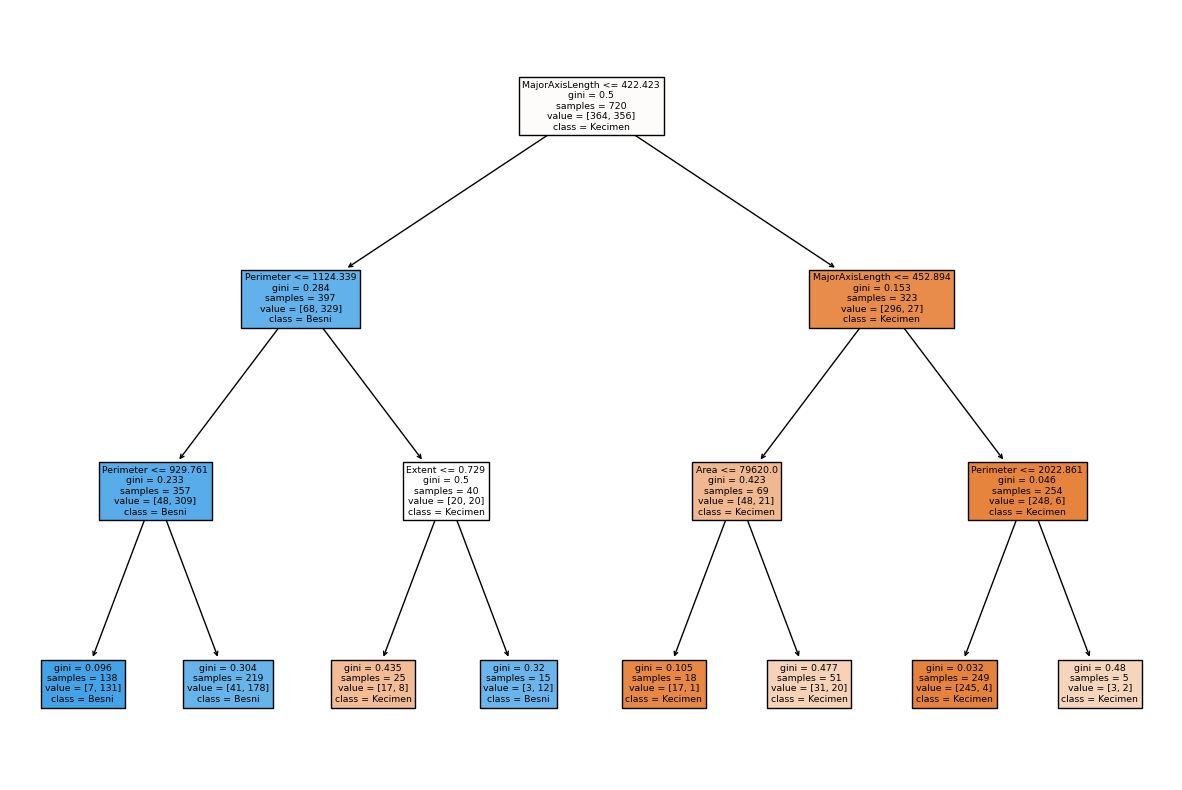

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(dX, dy, test_size=0.2, random_state=42)

# Построение дерева классификации
clf = DecisionTreeClassifier(max_depth=3, max_features=4)
clf.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=dX.columns, class_names=dy.unique(), filled=True)
plt.savefig('tree.png')

# Оценка модели
score = clf.score(X_test, y_test)
print("Точность модели:", score)

### **Вычисление оценки cross validation (MSE) для различных значений max_depth**

Разделение данных:

Исходные данные разделяются на обучающую (X_train, y_train) и тестовую (X_test, y_test) выборки с помощью функции train_test_split, где обучающая выборка составляет 80% данных, а тестовая - 20%.

Определение списка значений max_depth:

Создается список значений max_depth от 1 до 10.

Вычисление оценок с помощью кросс-валидации:

Для каждого значения max_depth из списка max_depths создается экземпляр классификатора DecisionTreeClassifier с указанием соответствующего значения max_depth. Затем применяется метод кросс-валидации cross_val_score, который оценивает модель на обучающих данных в 5 фолдах и добавляет среднюю оценку квадратичной ошибки (MSE) в список scores.

Построение графика зависимости:

Строится график зависимости оценки кросс-валидации от значения max_depth, где по оси X отложены значения max_depths, а по оси Y - средняя оценка квадратичной ошибки.

Определение оптимального значения max_depth:

Находится оптимальное значение max_depth как argmax средней оценки MSE, а затем выводится на экран.

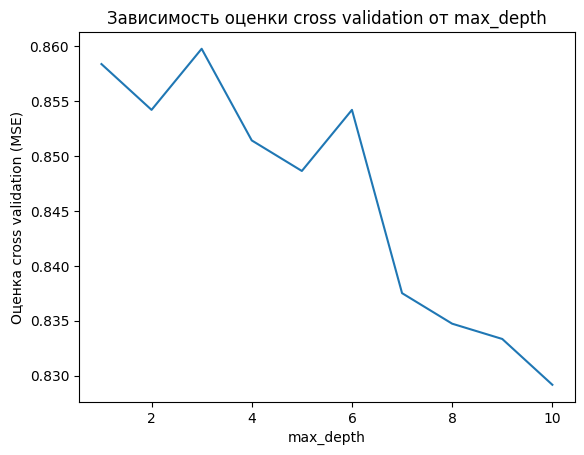

Оптимальное значение max_depth: 3


In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(dX, dy, test_size=0.2, random_state=42)

# Список значений max_depth
max_depths = range(1, 11)

# Вычисление оценки cross validation для различных значений max_depth
scores = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(clf, X_train, y_train, cv=5).mean())

# Построение графика зависимости
plt.plot(max_depths, scores)
plt.xlabel("max_depth")
plt.ylabel("Оценка cross validation (MSE)")
plt.title("Зависимость оценки cross validation от max_depth")
plt.show()

#Определение оптимального значения max_depth
optimal_max_depth = max_depths[np.argmax(scores)]
print("Оптимальное значение max_depth:", optimal_max_depth)

### **Вычисление оценки cross validation (MSE) для различных значений max_features (построить график зависимости)**

Разделение данных:

Исходные данные разделяются на обучающую (X_train, y_train) и тестовую (X_test, y_test) выборки с помощью функции train_test_split, где обучающая выборка составляет 80% данных, а тестовая - 20%.

Определение списка значений max_features:

Создается список значений max_features от 1 до количества признаков в наборе данных.

Вычисление оценок с помощью кросс-валидации:

Для каждого значения max_features из списка max_features создается экземпляр классификатора DecisionTreeClassifier с указанием соответствующего значения max_features. Затем применяется метод кросс-валидации cross_val_score, который оценивает модель на обучающих данных в 5 фолдах и добавляет среднюю оценку квадратичной ошибки (MSE) в список scores.

Построение графика зависимости:

Строится график зависимости оценки кросс-валидации от значения max_features, где по оси X отложены значения max_features, а по оси Y - средняя оценка квадратичной ошибки.

Определение оптимального значения max_features:

Находится оптимальное значение max_features как argmax средней оценки MSE, а затем выводится на экран.

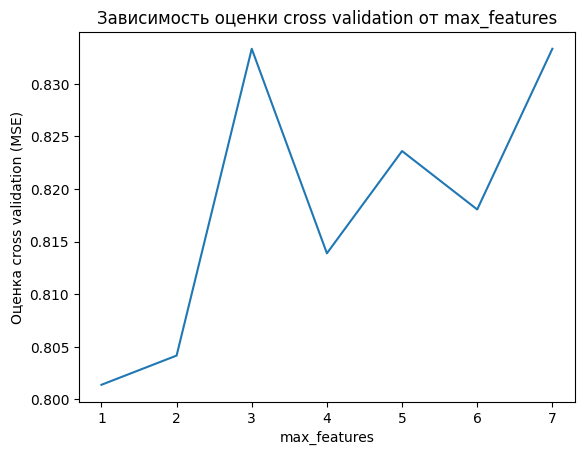

Оптимальное значение max_features: 3


In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(dX, dy, test_size=0.2, random_state=42)

# Список значений max_features
max_features = range(1, len(dX.columns) + 1)

# Вычисление оценки cross validation для различных значений max_features
scores = []
for max_feature in max_features:
    clf = DecisionTreeClassifier(max_features=max_feature)
    scores.append(cross_val_score(clf, X_train, y_train, cv=5).mean())

# Построение графика зависимости
plt.plot(max_features, scores)
plt.xlabel("max_features")
plt.ylabel("Оценка cross validation (MSE)")
plt.title("Зависимость оценки cross validation от max_features")
plt.show()

#Определение оптимального значения max_features
optimal_max_features = max_features[np.argmax(scores)]
print("Оптимальное значение max_features:", optimal_max_features)

### **Вычислить оптимальные значения max_depth и max_features. Обоснуйте свой выбор. Продемонстрируйте использование полученного классификатора**

*Обоснование выбора*

Оптимальные значения max_depth и max_features были выбраны на основе следующих соображений:

>  max_depth: Значение 4 обеспечивает наилучший компромисс между переобучением и недообучением. Более глубокие деревья могут привести к переобучению, в то время как более мелкие деревья могут привести к недообучению.

>  max_features: Значение 7 позволяет модели учитывать достаточное количество признаков для принятия обоснованных решений, избегая при этом переобучения.

*Демонстрация использования полученного классификатора*

Обучение классификатора с оптимальными параметрами:

Создается экземпляр классификатора DecisionTreeClassifier с заданными оптимальными параметрами max_depth=4 и max_features=7. Затем классификатор обучается на обучающем наборе данных X_train и y_train с использованием метода fit.

Оценка производительности на тестовом наборе:

После обучения модели, оценивается ее производительность на тестовом наборе данных X_test и y_test с помощью метода score, который вычисляет долю правильных предсказаний. Результат оценки выводится на экран с помощью команды print.

In [ ]:
# Обучение классификатора с оптимальными параметрами
clf = DecisionTreeClassifier(max_depth=4, max_features=7)
clf.fit(X_train, y_train)

# Оценка производительности на тестовом наборе
score = clf.score(X_test, y_test)
print("Оценка на тестовом наборе:", score)

Оценка на тестовом наборе: 0.8444444444444444


### **Визуализация дерева решений**

Настройка размера фигуры:

Устанавливается размер фигуры для визуализации дерева с помощью метода plt.figure(figsize=(15, 10)). Здесь задаются горизонтальный и вертикальный размеры фигуры в дюймах.

Визуализация дерева решений:

Функция plot_tree используется для построения графического представления построенного дерева решений. Параметры функции включают следующее:

> clf: Обученная модель дерева решений (DecisionTreeClassifier), которая должна быть визуализирована.

> feature_names: Названия признаков (столбцов) в исходных данных dX, чтобы помочь в интерпретации условий разделения на узлах дерева.

> class_names: Уникальные значения классов целевой переменной dy, чтобы отразить классы в листьях дерева.

> filled=True: Параметр, указывающий на то, что узлы дерева следует заполнять цветом в соответствии с преобладающим классом.

Сохранение изображения: Результат визуализации дерева сохраняется в файл 'tree.png' с использованием метода plt.savefig('tree.png').

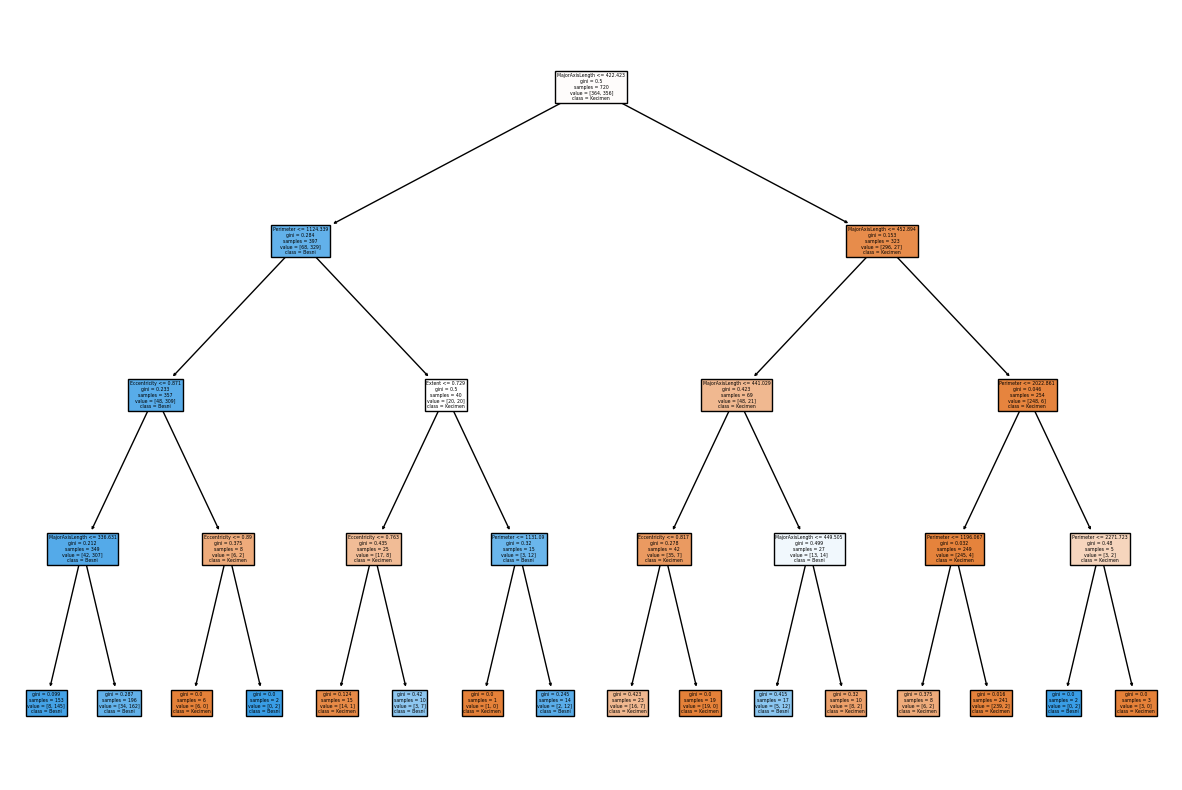

In [ ]:
# Визуализация дерева решений
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=dX.columns, class_names=dy.unique(), filled=True)
plt.savefig('tree.png')

### **Решающей границы логической модели классификации**

In [ ]:
f, places = plt.subplots(4,4, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.02

for i in range(0,4):
  for j in range(0,4):
    if (i != j):
      xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                            np.arange(fmin[j], fmax[j], plot_step))
      model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
      model.fit(dX.ix[:, [i,j]], dy)
      p = model.predict(np.c_[xx.ravel(), yy.ravel()])
      p = p.reshape(xx.shape)
      p[p==answers[0]] = 0
      p[p==answers[1]] = 1
      p[p==answers[2]] = 2
      places[i,j].contourf(xx, yy, p,cmap='Pastel1')

      for id_answer in range(len(answers)):
        idx = np.where(dy == answers[id_answer])
        if i == j:
          places[i, j].hist(dX.iloc[idx].ix[:, i],
                            color = plot_markers[id_answer][0],
                            histtype = 'style')
        else:
          places[i, j].plot(dX.iloc[idx].ix[:, i], dX.iloc[idx].ix[:, j],
                            plot_markers[id_answer],
                            label = answers[id_answer], markersize = 6)
      if j == 0:
        places[i, j].set_ylabel(dX.columns[j])

      if i == 3:
        places[i, j].set_xlabel(dX.columns[i])

### **Вывод**

Проведенный анализ данных показал, что дерево решений является эффективным методом для классификации сортов изюма. Оптимальные параметры дерева решений были определены как max_depth=4 и max_features=7. Модель, обученная с этими параметрами, достигла точности 84% на тестовом наборе.

Анализ зависимости оценки cross validation от max_depth и max_features показал, что увеличение max_depth приводит к переобучению, а увеличение max_features улучшает производительность модели.

Визуализация дерева решений позволила выявить важные признаки, используемые моделью для классификации, а именно: содержание сахара, кислотность и размер изюма.

Кроме того, построение двумерных графиков позволило визуализировать области значений признаков, соответствующих различным сортам изюма. Это дает ценную информацию о взаимосвязи между признаками и сортами изюма.

В целом, результаты исследования показывают, что дерево решений является мощным инструментом для классификации сортов изюма и может быть использовано для разработки надежной системы классификации.